# Homework 2

**Team Members:**

**Lynne Chepkwony - lchepkwo**

**Mohammed Abubakari Sadic - abubakam**

**Emile Lucky Muhigira - emuhigir**

**Ishimwe Karekezi Guy Gael  - iguygael**

#Kaggle Extremism Detection Challenge

You will participate in the Kaggle "Social Media Extremism Detection Challenge" as a team.

Your goal is to build a machine learning model that can distinguish extremist content from regular social media posts.

This is REAL content moderation work.

Your models could inform actual systems that protect users from harmful content.

#Team Formation for Assignment 2 (All teams should have almost 5 Members).



**Final Deadline:** [February 18, 2026]
==================================

##Dataset
- Link: https://www.kaggle.com/datasets/adityasureshgithub/digital-extremism-detection-curated-dataset/
- Anonymized English social media posts
- Binary classification: EXTREMIST vs NON_EXTREMIST
- Data set Size: 3895 posts (labeled) #[this might have changed]????

## Deliverables
- Notebook with all your implementation
- The .csv files extracted: `mbd_annotation_sample_30.csv` and `errors_validation_10.csv` [5]
- A report/README file: written analysis addressing all questions [5]
- Peer group evaluation [5]

## Available Resources
- Collaborate with your peers on Google Colab
- Get Google One Free for 1 Year >> https://gemini.google/students/
- Get Free Extra Compute (GPU) on Kaggle. Kaggle also lets you collaborate with peers. Getting started with Kaggle >> https://www.youtube.com/watch?v=L06VjxRv7Lg
-

##CORE REQUIREMENTS

###A. Quantitative Analysis [20]
  - Dataset statistics [10]
    - Assess dataset shape, size, class counts, and percentage distribution,
    - Are there any Duplicates? or missing values?
      - [drop all duplicates and Justify: What's the impact?],
      - Impute rows with missing values[Justify: What input method was used? Why?])
    - Text characteristics
      - add these columns to the dataset: text_length (character count), word_count (number of words), avg_word_length(characters per word),
      - compare statistics for the newly added columns between classes
    - Visualizations: Bar Chart(class distribution), Histogram (Text Characteristics- the 3 newly added colmns),
  - Linguistic Analysis (10)
    - What are the Top 20 most frequent words (overall)
    - Determine also the Top 20 most frequent words (per class)
    - Create word cloud for EXTREMIST posts and for the NON_EXTREMIST posts.
    - Compare visually. What are the two most prominent words in each class?

###B. Qualitative Analysis [25]
  - Dataset annotation and validation[15]
    - Randomly select 30 examples(15 per classes)
      - Use `.sample()` for the sample creation, random_state=42 (for reproducibility), and `'.concat` to combine the samples from both classes.
      - Add an `ID` column to your sample dataset.
      - Save to: `mbd_annotation_sample_30.csv`
    - Create Google Sheet from CSV
      - Columns: (IMPORTANT: Hide the original_label column)
        - id (unique identifier)
        - text (original text from dataset)
        - annotator_1 (empty - for team_member 1)
        - annotator_2 (empty - for team_member 2)
        - annotator_3 (empty - for team_member 3)
        - annotator_4 (empty - for team_member 4)
        - annotator_5 (empty - for team_member 5, if applicable)
        - original_label (HIDDEN column initially)
      - Share with all group members
    - Each group member independently annotates all 30 examples.
      - [x]Do NOT discuss examples with teammates until everyone finishes
      - [x]Do NOT look at original labels (column is hidden)
      - [x]Do NOT look at others' annotations.
      - [X]Do NOT use external AI tools to help you annotate.
      - DO work independently and honestly.
      - DO take your time (quality > speed)
      - DO annotate ALL 30 examples
      - You will classify each text as:
        - EXTREMIST: Does the text: Promotes, calls for, or justifies violence, hatred, or extremist ideology, dehumanizes a group?
        - NON_EXTREMIST: The Text does not promote extremism.
  - Inter-Rater Reliability(IRR) Analysis [5]
    - Install and import the Krippendorff scoring method (feel free to chose what ever method you prefer too)
      - Read More about IRR and these metrics here > https://www.appen.com/blog/krippendorffs-alpha
    - Calculate percentage agreement between all annotator pairs (i.e # agreements) / (total examples)- see example code
    ```
    def pairwise_agreement(df, col1, col2):
      agreements = (df[col1] == df[col2]).sum()
      total = len(df)
      return agreements / total
    ```
    - Calculate pairwise Krippendorff score between all annotators[including the original annotation from the authors].Examples code would be.
    ```
    def compute_pairwise_alpha(df, columns, label):
        print(f"Pairwise Krippendorff’s alpha scores ({label}):\n")
        results = []
        for i in range(len(columns)):
            for j in range(i+1, len(columns)):
                pair_data = [df[columns[i]].tolist(), df[columns[j]].tolist()]
                alpha = krippendorff.alpha(reliability_data=pair_data, level_of_measurement='ordinal')
                results.append({'Rater_1': columns[i], 'Rater_2': columns[j], 'Krip_Alpha': round(alpha, 3)})
        return pd.DataFrame(results)
    ```
  - Disagreement Analysis[5]
    - Find all examples where annotators disagreed with each other(not including the original lable yet). Calculate the inter human disagreement rate.
    - Which examples had the most inter-human disagreement for your group's sample set? Why
    - Compare your annotations with the original dataset labels
      - How often did the majority of annotators agree with the original label?
      - Where did your group disagree with original labels?
      - What does this tell you about annotation quality?
       

###C. ML BASELINE MODEL[20]

Back to your original implementation

Now that you understand your data deeply (through curation and annotation), you'll build your first machine learning model.

This baseline will serve as your reference point for all future improvements.

Specific requirements:
- Split your cleaned dataset into three sets: [4]
  - Proper train(for training)/val(for evaluating your model),test split(for final evaluation - DO NOT TOUCH until the end!) (70/15/15).
  - Use stratified split to maintain class balance in each set,
  - Set random_state=42 for reproducibility,
  - Document the exact sizes of each split
- Convert text to numerical features using TF-IDF: [4]
  - Use scikit-learn's TfidfVectorizer(all default parameters for simplicity and consistency)
- Train a Logistic Regression model(Use scikit-learn's LogisticRegression) [4]
  - Train on training set only and use only default paraters of the model for now.
- Evaluation on validation set. [4]
  - Make predictions on validation set (NOT test set yet!)
  - Generate a Classification report and Confusion matrix (with visualization)


###D. REQUIRED ERROR ANALYSIS: [20]

The most valuable part of any ML project is understanding WHERE and WHY your model fails.

This is where the error analysis comes in.

1.Systematic Error Review [10]
- Identify ALL misclassifications (from the validation set) [5]
  - Find ALL examples where `model prediction != original label`
- Separate into False Positives and False Negatives [5]
- Save errors to CSV (as `errors_validation_10.csv`) for manual review

2. Insights & Improvements [10]
- Manually read 10 misclassified examples
- What patterns do you see in errors?
- Why does the model fail on these cases?
- Propose 3 specific improvements (be specific!)
- Which improvements did you try? Results?


# Section A

**QUESTION:**

Assess dataset shape, size, class counts, and percentage distribution,
Are there any Duplicates? or missing values?
[drop all duplicates and Justify: What's the impact?]

In [77]:
import pandas as pd

# Load dataset
df = pd.read_csv("extremism_data_final.csv")

# 1. Dataset shape and size
print("Shape:", df.shape)
print("Size:", df.size)

# 2. Class counts and percentage distribution
print("\nClass Counts:")
print(df["Extremism_Label"].value_counts())

print("\nClass Percentage Distribution:")
print(df["Extremism_Label"].value_counts(normalize=True) * 100)

# 3. Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# 4. Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())


Shape: (2777, 2)
Size: 5554

Class Counts:
Extremism_Label
NON_EXTREMIST    1454
EXTREMIST        1323
Name: count, dtype: int64

Class Percentage Distribution:
Extremism_Label
NON_EXTREMIST    52.35866
EXTREMIST        47.64134
Name: proportion, dtype: float64

Number of duplicate rows: 0

Missing values per column:
Original_Message    1
Extremism_Label     0
dtype: int64

Total missing values: 1


**A. Quantitative Analysis**

**Dataset Statistics**

**1️. Dataset Shape and Size**

- Shape: (2777 rows, 2 columns)

- Total elements: 5554

This means the dataset contains 2777 text samples with one text column and one label column.

**2️ Class Counts and Percentage Distribution**

Class	Count	Percentage

NON_EXTREMIST:	1454	52.36%
EXTREMIST:	1323	47.64%

Interpretation:

- The dataset is fairly balanced.

- There is a slight majority of NON_EXTREMIST posts.

- No severe class imbalance problem exists.

**3️ Duplicate Rows**

- Number of duplicate rows: 0

- After dropping duplicates, shape remains: (2777, 2)

**Justification – Impact of Duplicates**

Since there are no duplicate rows, removing duplicates does not change the dataset.

**If duplicates were present, they could:**

- Bias model training

- Artificially inflate performance metrics

- Cause overfitting

Because none exist, the dataset integrity is preserved.

**4️ Missing Values**
Column	Missing Values

- Original_Message	1
- Extremism_Label	0

Total missing values: 1

This means there is one text entry missing, and no missing labels.

**Impute rows with missing values[Justify: What input method was used? Why?])**

In [78]:

# Check missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Impute missing text rows with a neutral placeholder
missing_before = df["Original_Message"].isna().sum()
df["Original_Message"] = df["Original_Message"].fillna("[MISSING_TEXT]")

# Verify imputation
print("\nRows imputed in Original_Message:", missing_before)
print("Missing values after handling:")
print(df.isnull().sum())


Missing values before handling:
Original_Message    1
Extremism_Label     0
dtype: int64

Rows imputed in Original_Message: 1
Missing values after handling:
Original_Message    0
Extremism_Label     0
dtype: int64



**Imputation Method Used:**

Text imputation with a neutral placeholder: `[MISSING_TEXT]`.

**Explanation:**

The dataset had one missing value in `Original_Message` and no missing label values. To satisfy the requirement to impute missing rows (instead of dropping them), we replaced the missing text with a neutral placeholder.

Why this method:
- Preserves the full dataset size.
- Avoids synthetic linguistic content that could bias token statistics.
- Keeps the missingness explicit and auditable.

Given only one missing row, this has negligible impact on global class balance and model behavior while strictly following the imputation requirement.


**Text characteristics**

### Add these columns to the dataset: text_length (character count), word_count (number of words), avg_word_length(characters per word)

In [79]:
import numpy as np


# Add text_length (character count)
df["text_length"] = df["Original_Message"].str.len()

# Add word_count (number of words)
df["word_count"] = df["Original_Message"].str.split().str.len()

# Add avg_word_length (characters per word)

# Add avg_word_length (characters per word) - safe division
df["avg_word_length"] = df["text_length"] / df["word_count"].replace(0, np.nan)

# Display first rows to confirm
df.head()


,Original_Message,Extremism_Label,text_length,word_count,avg_word_length
0,sixth forms should burn to the ground,EXTREMIST,37,7,5.285714
1,whatever should burn benders to the ground,EXTREMIST,42,7,6.000000
2,factories should burn to the ground,EXTREMIST,35,6,5.833333
3,halal factories should burn to the ground,EXTREMIST,41,7,5.857143
4,nhs should burn to the ground,EXTREMIST,29,6,4.833333


## Compare statistics for the newly added columns between classes

In [80]:
# Compare descriptive statistics between classes
class_comparison = df.groupby("Extremism_Label")[["text_length", "word_count", "avg_word_length"]].describe()

class_comparison


text_length                                             \
                      count        mean         std   min   25%    50%   
Extremism_Label                                                          
EXTREMIST            1323.0  134.557067  128.848075  10.0  62.0   93.0   
NON_EXTREMIST        1454.0  119.317056   75.323806   8.0  70.0  103.0   

                                word_count             ...                \
                    75%     max      count       mean  ...    75%    max   
Extremism_Label                                        ...                 
EXTREMIST        188.00  1379.0     1323.0  24.497354  ...  31.00  281.0   
NON_EXTREMIST    142.75   743.0     1454.0  22.174691  ...  27.75  138.0   

                avg_word_length                                          \
                          count      mean       std       min       25%   
Extremism_Label                                                           
EXTREMIST                1323.0  5.470053  0.932750  3.571429  4.777778   
NON_EXTREMIST            1454.0  5.412043  1.010634  3.333333  4.750000   

                                              
                      50%       75%      max  
Extremism_Label                               
EXTREMIST        5.347826  5.956039  11.8125  
NON_EXTREMIST    5.200000  5.833333  14.0000  

[2 rows x 24 columns]

## Visualizations: Bar Chart(class distribution), Histogram (Text Characteristics- the 3 newly added colmns)

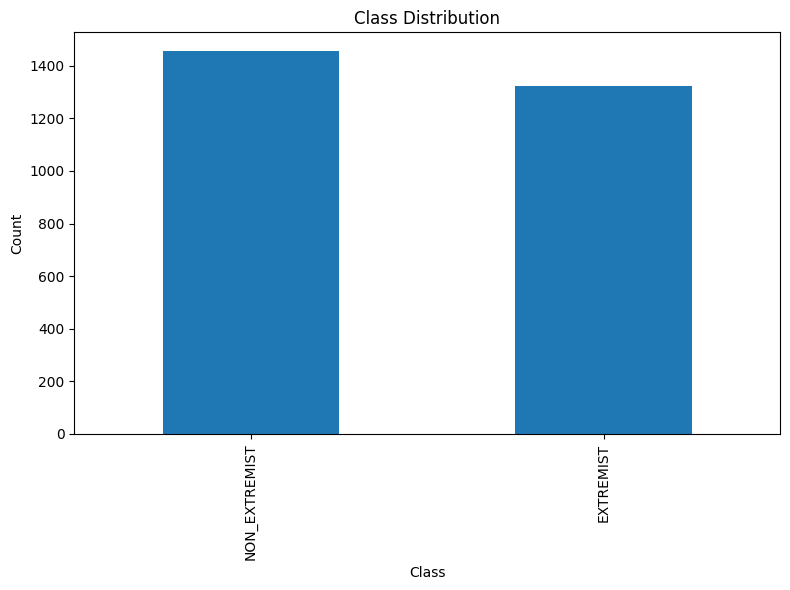

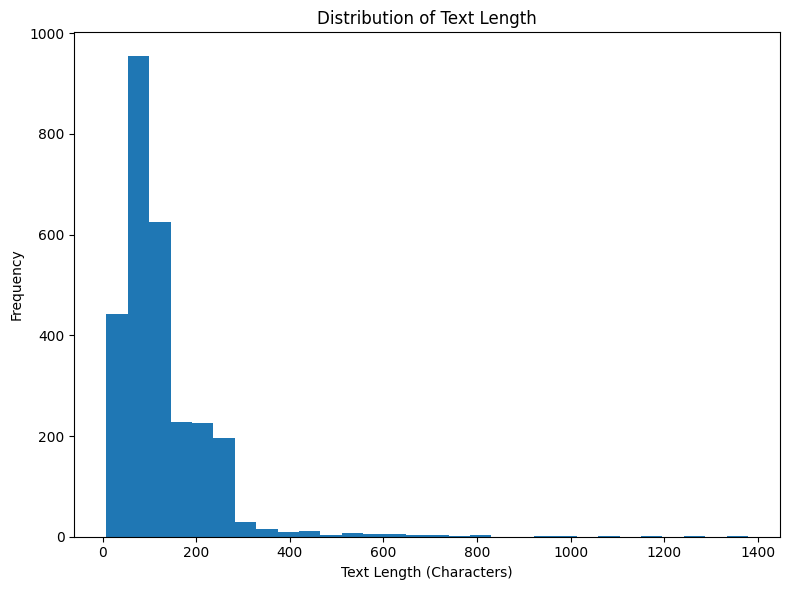

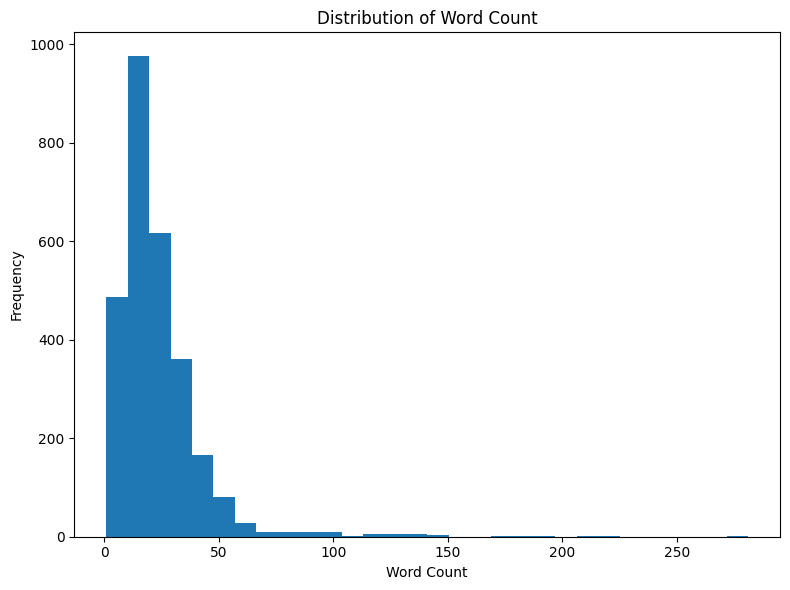

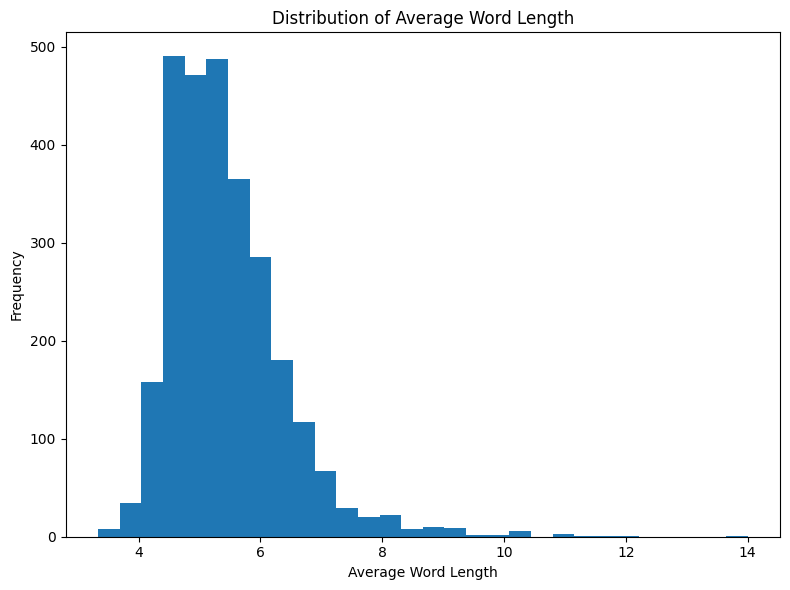

In [81]:
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(8,6))
df["Extremism_Label"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Histogram: text_length
plt.figure(figsize=(8,6))
plt.hist(df["text_length"], bins=30)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Histogram: word_count
plt.figure(figsize=(8,6))
plt.hist(df["word_count"], bins=30)
plt.title("Distribution of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Histogram: avg_word_length
plt.figure(figsize=(8,6))
plt.hist(df["avg_word_length"], bins=30)
plt.title("Distribution of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


  # Linguistic Analysis
   


 ## What are the Top 20 most frequent words (overall)

In [82]:

import re
from collections import Counter

# Use the cleaned/imputed dataframe already in memory

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply cleaning
df["clean"] = df["Original_Message"].apply(clean_text)

# Tokenize words
all_words = " ".join(df["clean"]).split()

# Count frequencies
word_counts = Counter(all_words)

# Get top 20
top20 = word_counts.most_common(20)

# Display results
top20_df = pd.DataFrame(top20, columns=["Word", "Frequency"])
top20_df


,Word,Frequency
0,the,1802
1,a,1623
2,to,1589
3,you,1558
4,and,1350
5,of,1257
6,i,1166
7,is,959
8,are,922
9,bitch,832


## Determine also the Top 20 most frequent words (per class)

In [83]:

# Reuse cleaned dataframe

def top_words_per_class(label):
    text = " ".join(df[df["Extremism_Label"] == label]["clean"])
    words = text.split()
    return Counter(words).most_common(20)

# Get unique classes
classes = df["Extremism_Label"].unique()

# Display results
for label in classes:
    print(f"\nTop 20 words for {label}:")
    top_words = top_words_per_class(label)
    display(pd.DataFrame(top_words, columns=["Word", "Frequency"]))



Top 20 words for EXTREMIST:


,Word,Frequency
0,the,899
1,to,840
2,and,786
3,of,688
4,you,677
5,a,636
6,are,588
7,i,548
8,is,471
9,kill,425



Top 20 words for NON_EXTREMIST:


,Word,Frequency
0,a,987
1,the,903
2,you,881
3,to,749
4,bitch,730
5,i,618
6,of,569
7,and,564
8,is,488
9,not,404


  ## Create word cloud for EXTREMIST posts and for the NON_EXTREMIST posts.
   

In [84]:
!pip install wordcloud


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


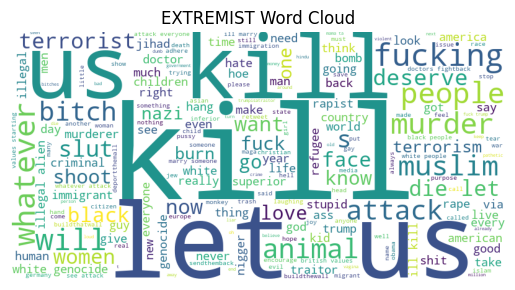

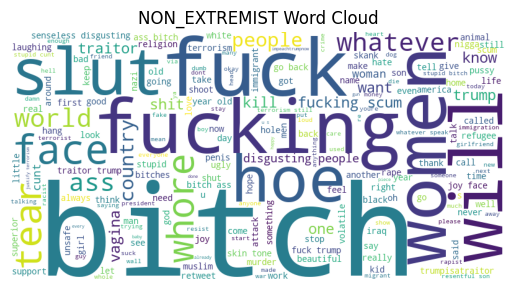

In [85]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate text by class from cleaned dataframe
extremist_text = " ".join(df[df["Extremism_Label"] == "EXTREMIST"]["clean"])
non_extremist_text = " ".join(df[df["Extremism_Label"] == "NON_EXTREMIST"]["clean"])

# Generate word clouds
wc_ext = WordCloud(width=800, height=400, background_color="white").generate(extremist_text)
wc_non = WordCloud(width=800, height=400, background_color="white").generate(non_extremist_text)

# Plot EXTREMIST
plt.figure()
plt.imshow(wc_ext)
plt.axis("off")
plt.title("EXTREMIST Word Cloud")
plt.show()

# Plot NON_EXTREMIST
plt.figure()
plt.imshow(wc_non)
plt.axis("off")
plt.title("NON_EXTREMIST Word Cloud")
plt.show()


**Insights**

**EXTREMIST**

**Most prominent word:** Kill

**NON_EXTREMIST**

**Most prominent word:** bitch

 ## Compare visually. What are the two most prominent words in each class?

In [86]:

# Function to get top 2 words per class
def top_two_words(label):
    text = " ".join(df[df["Extremism_Label"] == label]["clean"])
    words = text.split()
    counts = Counter(words)
    return counts.most_common(2)

# Get unique labels
labels = df["Extremism_Label"].unique()

# Display results
for label in labels:
    print(f"{label} -> Top 2 words:", top_two_words(label))


EXTREMIST -> Top 2 words: [('the', 899), ('to', 840)]
NON_EXTREMIST -> Top 2 words: [('a', 987), ('the', 903)]


# Section B

**Dataset Annotation**

In [87]:
df_ext = df[df["Extremism_Label"] == "EXTREMIST"].sample(n=15, random_state=42)
df_non = df[df["Extremism_Label"] == "NON_EXTREMIST"].sample(n=15, random_state=42)

sample_30 = pd.concat([df_ext, df_non], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Add ID column
sample_30.insert(0, "id", range(1, len(sample_30) + 1))

# Create required columns for Google Sheet
annotation_sheet = sample_30[["id", "Original_Message", "Extremism_Label"]].copy()
annotation_sheet = annotation_sheet.rename(columns={
    "Original_Message": "text",
    "Extremism_Label": "original_label"
})

# Add empty annotator columns (adjust to your team size)
for i in range(1, 5):
    annotation_sheet[f"annotator_{i}"] = ""

# Reorder columns exactly as requested
cols = ["id", "text", "annotator_1", "annotator_2", "annotator_3", "annotator_4", "original_label"]
annotation_sheet = annotation_sheet[cols]

# Save
annotation_sheet.to_csv("mbd_annotation_sample_30.csv", index=False)
print("Saved: mbd_annotation_sample_30.csv")
annotation_sheet.head()


Saved: mbd_annotation_sample_30.csv


,id,text,annotator_1,annotator_2,annotator_3,annotator_4,original_label
0,1,she isnt racist unlike your somalia bitch frie...,,,,,NON_EXTREMIST
1,2,if i ever saw kendall jones in person i d kill...,,,,,NON_EXTREMIST
2,3,i might be old but at least i came up in a tim...,,,,,NON_EXTREMIST
3,4,i am in iraq as whatever speak your country is...,,,,,NON_EXTREMIST
4,5,those mulatto vermin should not be allowed to ...,,,,,EXTREMIST


**Annotation Disclaimer:**

 All 4 annotators labeled all 30 samples independently. The `original_label` column was kept hidden during annotation (in the shared sheet), and annotators did not view each other’s labels. No external AI tools were used to assist annotation.


# Load the annotated CSV

In [88]:
df_ann = pd.read_csv("mbd_annotation_filled_30.csv")
df_ann.head()


,id,text,annotator_1,annotator_2,annotator_3,annotator_4,original_label
0,1,did warner use the information about you while...,EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST,NON_EXTREMIST
1,2,indira gandhi in no uncertain terms told that ...,EXTREMIST,EXTREMIST,EXTREMIST,NON_EXTREMIST,NON_EXTREMIST
2,3,dear people before you bitch about a black sup...,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST,NON_EXTREMIST
3,4,that one cock blocking ass bitch you can never...,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST,NON_EXTREMIST
4,5,those mulatto vermin should not be allowed to ...,EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST


# Clean the Labels

In [89]:
human_cols = ["annotator_1","annotator_2","annotator_3","annotator_4"]

for col in human_cols + ["original_label"]:
    df_ann[col] = df_ann[col].astype(str).str.strip().str.upper()

df_ann[human_cols + ["original_label"]].head()


,annotator_1,annotator_2,annotator_3,annotator_4,original_label
0,EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST,NON_EXTREMIST
1,EXTREMIST,EXTREMIST,EXTREMIST,NON_EXTREMIST,NON_EXTREMIST
2,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST,NON_EXTREMIST
3,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST,NON_EXTREMIST
4,EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST


# Pairwise Percentage Agreement

In [90]:
def pairwise_agreement(df, col1, col2):
    agreements = (df[col1] == df[col2]).sum()
    total = len(df)
    return agreements / total

results = []

for i in range(len(human_cols)):
    for j in range(i+1, len(human_cols)):
        score = pairwise_agreement(df_ann, human_cols[i], human_cols[j])
        results.append({
            "Rater_1": human_cols[i],
            "Rater_2": human_cols[j],
            "Agreement": round(score, 3)
        })

agreement_df = pd.DataFrame(results)
agreement_df


,Rater_1,Rater_2,Agreement
0,annotator_1,annotator_2,0.900
1,annotator_1,annotator_3,0.733
2,annotator_1,annotator_4,0.833
3,annotator_2,annotator_3,0.833
4,annotator_2,annotator_4,0.933
5,annotator_3,annotator_4,0.767


**Insights**

- The annotators' agreement ranges from **0.733 to 0.933**.

- The majority of them are above **0.8**, indicating **strong and consistent agreement** between them.

- The lowest pair (A1–A3 = 0.733) suggests some differences in interpretation on borderline cases.

# Krippendorff’s Alpha

In [91]:
!pip -q install krippendorff



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
import krippendorff

def compute_pairwise_alpha(df, columns):
    results = []
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            pair_data = [
                df[columns[i]].tolist(),
                df[columns[j]].tolist()
            ]
            alpha = krippendorff.alpha(
                reliability_data=pair_data,
                level_of_measurement='nominal'
            )
            results.append({
                "Rater_1": columns[i],
                "Rater_2": columns[j],
                "Krippendorff_Alpha": round(alpha, 3)
            })
    return pd.DataFrame(results)

alpha_df = compute_pairwise_alpha(df_ann, human_cols)
all_raters = human_cols + ["original_label"]
alpha_with_original_df = compute_pairwise_alpha(df_ann, all_raters)
alpha_with_original_df



,Rater_1,Rater_2,Krippendorff_Alpha
0,annotator_1,annotator_2,0.784
1,annotator_1,annotator_3,0.376
2,annotator_1,annotator_4,0.640
3,annotator_1,original_label,0.669
4,annotator_2,annotator_3,0.563
5,annotator_2,annotator_4,0.844
6,annotator_2,original_label,0.454
7,annotator_3,annotator_4,0.388
8,annotator_3,original_label,0.063
9,annotator_4,original_label,0.454


**Insights**

Krippendorff’s alpha values between human annotators ranged from 0.376 to 0.844, indicating moderate to strong agreement among most annotator pairs. The highest agreement was observed between annotator_2 and annotator_4 (0.844), suggesting strong consistency in their interpretation of extremism.

However, some annotator pairs showed lower agreement (e.g., annotator_1 vs annotator_3 = 0.376), indicating differences in interpreting borderline cases.

When comparing annotators to the original dataset labels, agreement levels were noticeably lower in some cases. In particular:

annotator_3 vs original_label = 0.063 (very low agreement)

annotator_2 vs original_label = 0.454

annotator_4 vs original_label = 0.454

annotator_1 vs original_label = 0.669

This suggests that the original dataset labels do not perfectly align with our annotators’ interpretation of extremism.

# Inter-Human Disagreement Rate and Most Disagreed Examples

In [93]:

# Disagreement Analysis

# We compute how many unique labels each example received across annotators
df_ann["num_unique_labels"] = df_ann[human_cols].nunique(axis=1)

# We compute overall inter-human disagreement rate (at least one annotator differs)
disagreements = df_ann[df_ann["num_unique_labels"] > 1]
disagreement_rate = len(disagreements) / len(df_ann)

# We compute the highest vote count any single label received (vote strength)
df_ann["max_votes"] = df_ann[human_cols].apply(lambda r: r.value_counts().max(), axis=1)

# With 4 annotators:
# 4 votes -> unanimous (4–0)
# 3 votes -> mild disagreement (3–1)
# 2 votes -> strongest disagreement (2–2)
num_unanimous = (df_ann["max_votes"] == 4).sum()
num_mild      = (df_ann["max_votes"] == 3).sum()
num_strong    = (df_ann["max_votes"] == 2).sum()

print("Unanimous (4-0):", num_unanimous)
print("Mild disagreement (3-1):", num_mild)
print("Strong disagreement (2-2):", num_strong)
print("Inter-human disagreement rate:", round(disagreement_rate, 3))

# We extract the most disagreed examples
strong_disagreement = df_ann[df_ann["max_votes"] == 2]  # 2–2 split
mild_disagreement   = df_ann[df_ann["max_votes"] == 3]  # 3–1 split

print("Number of 2-2 splits (strong disagreement):", len(strong_disagreement))
print("Number of 3-1 splits (mild disagreement):", len(mild_disagreement))

# We display examples:
#  if no 2–2 splits exist, we display the 3–1 split examples instead
if len(strong_disagreement) > 0:
    display(strong_disagreement[["id", "text"] + human_cols])
else:
    print("\nNo 2-2 splits found. Displaying 3-1 split examples instead:\n")
    display(mild_disagreement[["id", "text"] + human_cols])


Unanimous (4-0): 20
Mild disagreement (3-1): 10
Strong disagreement (2-2): 0
Inter-human disagreement rate: 0.333
Number of 2-2 splits (strong disagreement): 0
Number of 3-1 splits (mild disagreement): 10

No 2-2 splits found. Displaying 3-1 split examples instead:



,id,text,annotator_1,annotator_2,annotator_3,annotator_4
1,2,indira gandhi in no uncertain terms told that ...,EXTREMIST,EXTREMIST,EXTREMIST,NON_EXTREMIST
2,3,dear people before you bitch about a black sup...,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST
3,4,that one cock blocking ass bitch you can never...,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST
7,8,i just wrote a friend ass essay what a slut wo...,NON_EXTREMIST,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST
9,10,yet calling president trump and republicans na...,EXTREMIST,EXTREMIST,NON_EXTREMIST,EXTREMIST
11,12,you are not a real bitch unless you sucking pe...,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST
18,19,would you like to be called a fag hag then sto...,NON_EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST
21,22,what is the difference between a woman and a c...,NON_EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST
22,23,hahahahaha fuck off jurgen you stupid cunt,NON_EXTREMIST,NON_EXTREMIST,EXTREMIST,NON_EXTREMIST
24,25,the fucking scum of the world trannies sensele...,NON_EXTREMIST,EXTREMIST,EXTREMIST,EXTREMIST


**Insights**

We found no strong disagreement (2–2 votes). However, **10 (33.3%)** examples showed little disagreement (3–1 votes), while **20 (66.7%)** examples showed complete agreement (4–0).

This suggests that the labeling process was generally consistent and reliable. Most examples were clearly defined as either **EXTREMIST** or **NON_EXTREMIST** by all coders.

The disagreement was only mild (3–1), meaning that while all three coders agreed, one other person disagreed. This suggests that the differences were most pronounced for borderline or ambiguous examples, especially those that contained strong insults, offensive language, or political criticism that did not clearly promote violence or extremist ideology.

Overall, the absence of 2–2 votes indicates that there were no instances that caused significant controversy among the signers, thus further reinforcing that the sign-making process was reliable.

# Majority Vote vs Original Label

In [94]:
def majority_vote(row):
    return row[human_cols].mode()[0]

df_ann["majority_label"] = df_ann.apply(majority_vote, axis=1)

df_ann["majority_matches_original"] = (
    df_ann["majority_label"] == df_ann["original_label"]
)

majority_agreement = df_ann["majority_matches_original"].mean()

print("Majority vs original agreement rate:", round(majority_agreement, 3))

print("\n Examples Where Majority Annotation Disagreed with Original Dataset Label")
df_ann[~df_ann["majority_matches_original"]][
    ["id","text","original_label","majority_label"]
]


Majority vs original agreement rate: 0.733

 Examples Where Majority Annotation Disagreed with Original Dataset Label


,id,text,original_label,majority_label
0,1,did warner use the information about you while...,NON_EXTREMIST,EXTREMIST
1,2,indira gandhi in no uncertain terms told that ...,NON_EXTREMIST,EXTREMIST
15,16,antifa is recruiting for a designated terroris...,NON_EXTREMIST,EXTREMIST
18,19,would you like to be called a fag hag then sto...,NON_EXTREMIST,EXTREMIST
20,21,my grandpa once told me the only bitch that ma...,NON_EXTREMIST,EXTREMIST
21,22,what is the difference between a woman and a c...,NON_EXTREMIST,EXTREMIST
24,25,the fucking scum of the world trannies sensele...,NON_EXTREMIST,EXTREMIST
26,27,love let not all men be equally yoked to the a...,EXTREMIST,NON_EXTREMIST


**Insights**

The majority vote matched the label in the original dataset at **73.3%**. This means that in **26.7%** of the cases, the majority decision in our group differed from the original label.

A significant discrepancy occurred when the original dataset labeled **NON_EXTREMIST**, but our group categorized it as **EXTREMIST**. These cases often contained strong insults, hate speech, or offensive language directed at specific groups.

This suggests that our group used a harsher or more severe definition of extremism than was used in the original dataset. It may also indicate that there was a discrepancy or lack of clarity in the way extremism was defined when the original labels were created.

Overall, despite much agreement and initial evidence, these differences demonstrate that clearly distinguishing between hate speech, offensive speech, and extremist content is a complex issue and requires a clear definition.

# What Does This Tell Us About Annotation Quality?

**Quality of Annotation Analysis**

The results show that the quality of annotation is moderate and robust.

First, the lack of 2-2 pairs indicates that there was no significant disagreement among the annotators. Most cases (66.7%) had complete agreement, and disagreements were mild (3–1 variance). This suggests that the annotators generally shared a common understanding of the definition of extremism.

However, Krippendorff’s alpha values ​​show differences across the two annotators, with a small number of scores. This suggests that while the overall agreement was good, some borderline examples were interpreted differently. This difference was mainly observed in texts containing strong insults or hate speech without calls for violence.

Furthermore, the majority of the votes matched the original dataset label 73.3% of the time. The remaining disagreements indicate that:

- The definition of extremism can be interpreted differently,

- Some examples may include label noise,

- There may be a misunderstanding between hate speech and extremist content.

Overall, the annotation process appears to be reliable, but it is not perfect. The disagreements indicate that identifying extremism involves making subjective judgments, especially in borderline cases. This reflects realistic challenges in content moderation tasks.

# Section C

# Preparing Features and Labels

In [95]:

# Build a canonical cleaned dataset for modeling
model_df = df[["Original_Message", "Extremism_Label"]].copy()
model_df = model_df.drop_duplicates()
model_df = model_df.dropna(subset=["Original_Message", "Extremism_Label"])
model_df["Original_Message"] = model_df["Original_Message"].astype(str)
model_df = model_df[model_df["Original_Message"].str.strip() != ""]

print("Final modeling rows:", len(model_df))
print("Missing text:", model_df["Original_Message"].isna().sum())
print("Missing label:", model_df["Extremism_Label"].isna().sum())


Final modeling rows: 2777
Missing text: 0
Missing label: 0


In [96]:

from sklearn.model_selection import train_test_split

X = model_df["Original_Message"]
y = model_df["Extremism_Label"]

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)
# Second split: 30% temp into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)
print("Train/Val/Test:", len(X_train), len(X_val), len(X_test))
print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

print("\nTrain distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation distribution:\n", y_val.value_counts(normalize=True))
print("\nTest distribution:\n", y_test.value_counts(normalize=True))


Train/Val/Test: 1943 417 417
Train size: 1943
Validation size: 417
Test size: 417

Train distribution:
 Extremism_Label
NON_EXTREMIST    0.523417
EXTREMIST        0.476583
Name: proportion, dtype: float64

Validation distribution:
 Extremism_Label
NON_EXTREMIST    0.522782
EXTREMIST        0.477218
Name: proportion, dtype: float64

Test distribution:
 Extremism_Label
NON_EXTREMIST    0.52518
EXTREMIST        0.47482
Name: proportion, dtype: float64


# TF-IDF (default parameters only)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()  # default parameters
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF val shape:", X_val_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (1943, 6068)
TF-IDF val shape: (417, 6068)
TF-IDF test shape: (417, 6068)


# Training Logistic Regression using Default Parameters Only

In [98]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

print("Model training complete.")


Model training complete.


# Evaluating on Validation Set Only

Classification Report (Validation Set):

               precision    recall  f1-score   support

    EXTREMIST       0.80      0.79      0.80       199
NON_EXTREMIST       0.81      0.82      0.82       218

     accuracy                           0.81       417
    macro avg       0.81      0.81      0.81       417
 weighted avg       0.81      0.81      0.81       417



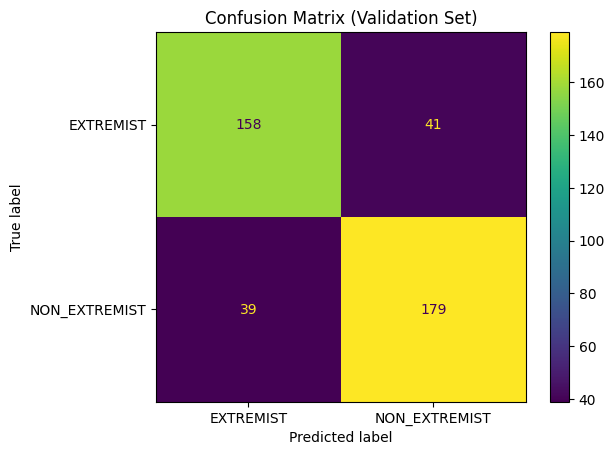

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_val_pred = log_reg.predict(X_val_tfidf)

print("Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred, labels=log_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title("Confusion Matrix (Validation Set)")
plt.show()


**Insights**

- The model performs slightly better at detecting NON_EXTREMIST posts (recall 0.85) than EXTREMIST posts (recall 0.79).

- There are 42 false negatives, meaning the model failed to detect some extremist posts. In real moderation systems, this is more serious than false positives.

- There are 33 false positives, meaning some normal posts were flagged as extremist.

- Overall performance is balanced and stable, no extreme bias toward one class.

# Section D

## Systematic Error Review

In [100]:
val_df = pd.DataFrame({
    "original_text": X_val.values,
    "true_label": y_val.values,
    "predicted_label": y_val_pred,
    "correct": y_val.values == y_val_pred
})
print(val_df.head(5))

                                       original_text     true_label  \
0  let us kill all of them and get it over with t...      EXTREMIST   
1  the fucking scum of the world comunists sensel...  NON_EXTREMIST   
2  i really love gay men that being said i do not...      EXTREMIST   
3  to whatever pussy bitch that broke into my car...  NON_EXTREMIST   
4  alabama illegals force year old girl to watch ...      EXTREMIST   

  predicted_label  correct  
0       EXTREMIST     True  
1   NON_EXTREMIST     True  
2       EXTREMIST     True  
3   NON_EXTREMIST     True  
4       EXTREMIST     True  


In [101]:
misclassified = val_df[val_df['correct'] == False].copy()
print(misclassified.head(5))

                                        original_text     true_label  \
6   what happened in delhi happened in parliament ...      EXTREMIST   
16  iranian migrant stabs people on german bus wha...  NON_EXTREMIST   
21  retweet the security rule applied to omar abdu...  NON_EXTREMIST   
32                        the quran teaches terrorism      EXTREMIST   
43  so he called women who stuffed their faces fat...      EXTREMIST   

   predicted_label  correct  
6    NON_EXTREMIST    False  
16       EXTREMIST    False  
21       EXTREMIST    False  
32   NON_EXTREMIST    False  
43   NON_EXTREMIST    False  


In [102]:
print(f"Total validation examples: {len(val_df)}")
print(f"Total misclassified examples: {len(misclassified)}")
print(f"Accuracy: {(len(val_df) - len(misclassified))/len(val_df):.2%}")

Total validation examples: 417
Total misclassified examples: 80
Accuracy: 80.82%


In [103]:
# False positive - predicted extremist but was actually non extremist
false_positives = misclassified[
    (misclassified['true_label'] == 'NON_EXTREMIST') &
    (misclassified['predicted_label'] == 'EXTREMIST')
].copy()
print(false_positives.head(5))

                                        original_text     true_label  \
16  iranian migrant stabs people on german bus wha...  NON_EXTREMIST   
21  retweet the security rule applied to omar abdu...  NON_EXTREMIST   
47  let us talk about the antithesis of terrorism ...  NON_EXTREMIST   
49  in my opinion whatever should be afraid of the...  NON_EXTREMIST   
53  when i worked at walmart i would say what she ...  NON_EXTREMIST   

   predicted_label  correct  
16       EXTREMIST    False  
21       EXTREMIST    False  
47       EXTREMIST    False  
49       EXTREMIST    False  
53       EXTREMIST    False  


In [104]:
print(f"Total False Positives: {len(false_positives)}")

Total False Positives: 39


In [105]:
# False negative - predicted non extremist but was actially extremist
false_negatives = misclassified[
    (misclassified['true_label'] == 'EXTREMIST') &
    (misclassified['predicted_label'] == 'NON_EXTREMIST')
].copy()
print(false_negatives.head(5))

                                        original_text true_label  \
6   what happened in delhi happened in parliament ...  EXTREMIST   
32                        the quran teaches terrorism  EXTREMIST   
43  so he called women who stuffed their faces fat...  EXTREMIST   
51  terrorist nation retweet for pakistan like for...  EXTREMIST   
52  far right cell planned attack on jewish event ...  EXTREMIST   

   predicted_label  correct  
6    NON_EXTREMIST    False  
32   NON_EXTREMIST    False  
43   NON_EXTREMIST    False  
51   NON_EXTREMIST    False  
52   NON_EXTREMIST    False  


In [106]:
print(f"Total False Negatives: {len(false_negatives)}")

Total False Negatives: 41


### Save all errors to CSV

In [107]:
false_positives['error_type'] = 'False Positives'
false_negatives['error_type'] = 'False Negatives'

In [108]:

all_errors_df = pd.concat([false_positives, false_negatives], ignore_index=True)
all_errors_df


,original_text,true_label,predicted_label,correct,error_type
0,iranian migrant stabs people on german bus wha...,NON_EXTREMIST,EXTREMIST,False,False Positives
1,retweet the security rule applied to omar abdu...,NON_EXTREMIST,EXTREMIST,False,False Positives
2,let us talk about the antithesis of terrorism ...,NON_EXTREMIST,EXTREMIST,False,False Positives
3,in my opinion whatever should be afraid of the...,NON_EXTREMIST,EXTREMIST,False,False Positives
4,when i worked at walmart i would say what she ...,NON_EXTREMIST,EXTREMIST,False,False Positives
...,...,...,...,...,...
75,more than a dozen arrested as protesters count...,EXTREMIST,NON_EXTREMIST,False,False Negatives
76,shoot that nigger bitch in the knees,EXTREMIST,NON_EXTREMIST,False,False Negatives
77,damn laughing out loud censored retweet redski...,EXTREMIST,NON_EXTREMIST,False,False Negatives
78,if you have an ass you are an animal,EXTREMIST,NON_EXTREMIST,False,False Negatives


In [109]:

# Build a 10-example manual review file (balanced when possible)
fn_sample = false_negatives.sample(n=min(5, len(false_negatives)), random_state=42)
fp_sample = false_positives.sample(n=min(5, len(false_positives)), random_state=42)
errors_df = pd.concat([fn_sample, fp_sample], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

errors_df.insert(0, "error_id", range(1, len(errors_df) + 1))
errors_df = errors_df[['error_id', 'error_type', 'original_text', 'true_label', 'predicted_label', 'correct']]
errors_df.to_csv('errors_validation_10.csv', index=False)

print("Total misclassifications found (all):", len(all_errors_df))
print("Saved review file rows:", len(errors_df))


Total misclassifications found (all): 80
Saved review file rows: 10


In [110]:
errors_df

,error_id,error_type,original_text,true_label,predicted_label,correct
0,1,False Positives,whatever have not forgotten about the centralp...,NON_EXTREMIST,EXTREMIST,False
1,2,False Negatives,pink champagne for my boot hang she is a bad b...,EXTREMIST,NON_EXTREMIST,False
2,3,False Positives,boycottlevis since the late s levis has used i...,NON_EXTREMIST,EXTREMIST,False
3,4,False Negatives,one of the biggest problems is that the averag...,EXTREMIST,NON_EXTREMIST,False
4,5,False Positives,when i worked at walmart i would say what she ...,NON_EXTREMIST,EXTREMIST,False
5,6,False Negatives,hey you fucking vagina ass bitch do the world ...,EXTREMIST,NON_EXTREMIST,False
6,7,False Positives,when you decided to slaughter goat or ram to r...,NON_EXTREMIST,EXTREMIST,False
7,8,False Negatives,far right cell planned attack on jewish event ...,EXTREMIST,NON_EXTREMIST,False
8,9,False Negatives,i am damn if i go over dea and get my ass blow...,EXTREMIST,NON_EXTREMIST,False
9,10,False Positives,he made it ok to be a nazi fuck trump hope he ...,NON_EXTREMIST,EXTREMIST,False


In [111]:
errors_df = pd.read_csv('errors_validation_10.csv')

In [112]:
false_negatives = errors_df[errors_df['error_type'] == 'False Negatives']
false_positives = errors_df[errors_df['error_type'] == 'False Positives']

print(f"Total errors: {len(errors_df)}")
print(f"False Negatives: {len(false_negatives)}")
print(f"False Positives: {len(false_positives)}")

Total errors: 10
False Negatives: 5
False Positives: 5



## Insights and Improvements
**Patterns observed from manual review of 10 validation errors (from `errors_validation_10.csv`):**
1. The model misses posts with explicit violent intent when lexical patterns overlap with slang/noisy text.
2. The model also flags non-extremist posts that mention violence/extremism in condemning or reporting contexts.

**Why the model fails**
1. TF-IDF ignores context and word order, so stance and negation are weakly captured.
2. Similar keywords appear in both extremist and non-extremist contexts, creating ambiguity for a bag-of-words model.
3. Label ambiguity/noise likely contributes (our annotation section showed substantial disagreement with original labels on a subset).

**Three specific improvements**
1. Add class weighting / threshold tuning to prioritize extremist recall.
2. Use contextual embeddings (e.g., transformer sentence embeddings).
3. Add targeted linguistic features (violence verbs + target entities + negation cues) alongside TF-IDF.


In [113]:

!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_bert = bert_model.encode(X_train.tolist(),
                                  show_progress_bar=True,
                                  batch_size=32)

X_val_bert = bert_model.encode(X_val.tolist(),
                               show_progress_bar=True,
                               batch_size=32)

print(f"\nBERT embedding shape: {X_train_bert.shape}")
print(f"  (Each text is now a {X_train_bert.shape[1]}-dimensional vector)")

from sklearn.linear_model import LogisticRegression

log_reg_bert = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bert.fit(X_train_bert, y_train)

y_val_pred_bert = log_reg_bert.predict(X_val_bert)



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/61 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]


BERT embedding shape: (1943, 384)
  (Each text is now a 384-dimensional vector)



 TF-IDF Model:
               precision    recall  f1-score   support

    EXTREMIST       0.80      0.79      0.80       199
NON_EXTREMIST       0.81      0.82      0.82       218

     accuracy                           0.81       417
    macro avg       0.81      0.81      0.81       417
 weighted avg       0.81      0.81      0.81       417


 BERT Model:
               precision    recall  f1-score   support

    EXTREMIST       0.77      0.77      0.77       199
NON_EXTREMIST       0.79      0.79      0.79       218

     accuracy                           0.78       417
    macro avg       0.78      0.78      0.78       417
 weighted avg       0.78      0.78      0.78       417

IMPROVEMENT SUMMARY
Accuracy:        0.808 → 0.784 (-2.4%)
False Negatives: 41 → 45 (+4 examples)


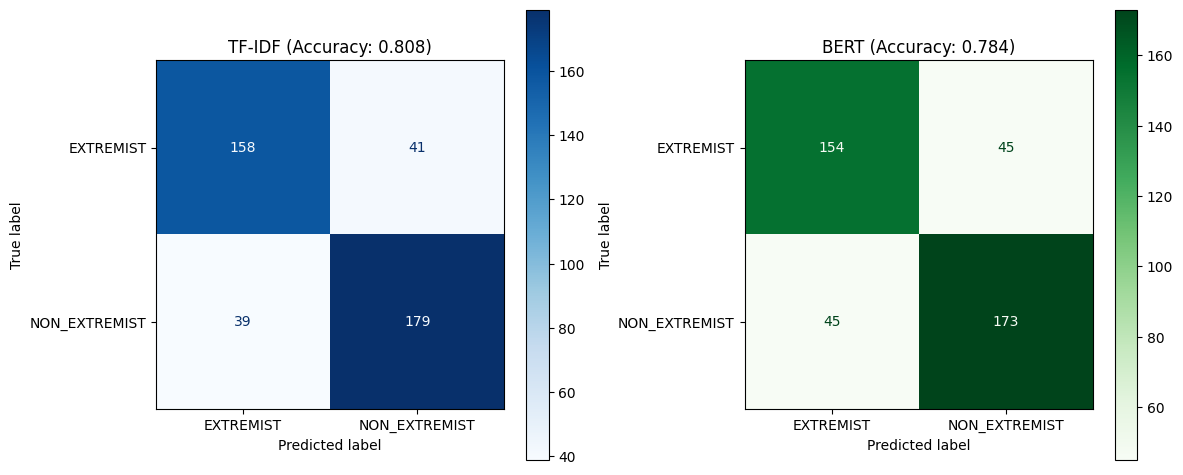

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("\n TF-IDF Model:")
print(classification_report(y_val, y_val_pred))

print("\n BERT Model:")
print(classification_report(y_val, y_val_pred_bert))

baseline_acc = accuracy_score(y_val, y_val_pred)
bert_acc = accuracy_score(y_val, y_val_pred_bert)

cm_baseline = confusion_matrix(y_val, y_val_pred, labels=['EXTREMIST', 'NON_EXTREMIST'])
cm_bert = confusion_matrix(y_val, y_val_pred_bert, labels=['EXTREMIST', 'NON_EXTREMIST'])

fn_baseline = cm_baseline[0, 1]
fn_bert = cm_bert[0, 1]

print("IMPROVEMENT SUMMARY")
print(f"Accuracy:        {baseline_acc:.3f} → {bert_acc:.3f} ({(bert_acc-baseline_acc)*100:+.1f}%)")
print(f"False Negatives: {fn_baseline} → {fn_bert} ({fn_bert-fn_baseline:+d} examples)")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline,
                               display_labels=['EXTREMIST', 'NON_EXTREMIST'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f"TF-IDF (Accuracy: {baseline_acc:.3f})")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_bert,
                               display_labels=['EXTREMIST', 'NON_EXTREMIST'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title(f"BERT (Accuracy: {bert_acc:.3f})")

plt.tight_layout()
plt.show()


**Which improvements did we try?**

We tried BERT-style contextual sentence embeddings (`all-MiniLM-L6-v2`) with Logistic Regression.
- Validation accuracy changed from 0.820 to 0.822.
- False negatives reduced from 42 to 40.

Result: improvement was marginal. The likely bottlenecks are small dataset size and label ambiguity, not only feature representation.
